<a href="https://colab.research.google.com/github/huckfive/ImageClassification/blob/main/Copy_of_CNN_Weed_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data_dir = 'data'

In [7]:
data_dir

'data'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
os.listdir(data_dir)

['leafyspurge', '.ipynb_checkpoints', 'phragmites']

In [10]:
for image_class in os.listdir(data_dir):
    print(image_class)

leafyspurge
.ipynb_checkpoints
phragmites


In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

images109.jpg
images152.jpg
images130.jpg
5607505.jpg
Kristian-Peters_-Creative-Commons-Attribution-Share-Alike-3.0-via-Wikimedia.jpeg
images257.jpg
images36.jpg
Euphorbia_esula_-_kibe_piimalill.jpg
images162.jpg
images85.jpg
images175.jpg
721142-20070719-leafyspurge.jpg
images166.jpg
images275.jpg
images89.jpg
images225.jpg
leafy_spurge_12-29-13.jpg
images172.jpg
image.jpeg
images93.jpg
images49.jpg
images71.jpg
images286.jpg
1_P6150178.jpg_LeafySpurge_06152020_GLS_02.jpg
topimage-montanaweedcontrolassoc_1.jpg
images40.jpg
images86.jpg
images115.jpg
images76.jpg
f36b9b_47da251957f8401a9392e17448339693mv2.jpg
images23.jpg
images148.jpg
images222.jpg
leafy-spurge-by-ed-l-pawpaw67-thumb.jpg
images250.jpg
images24.jpg
images77.jpg
images138.jpg
images192.jpg
ls.jpg
image19.jpeg
images248.jpg
images129.jpg
images186.jpg
image26.jpeg
images205.jpg
images53.jpg
images282.jpg
images210.jpg
images128.jpg
images200.jpg
images105.jpg
images227.jpg
images255.jpg
image21.jpeg
images273.jpg
images2

array([[[217, 207, 189],
        [218, 208, 190],
        [219, 209, 191],
        ...,
        [218, 202, 185],
        [217, 201, 184],
        [216, 200, 183]],

       [[216, 206, 188],
        [217, 207, 189],
        [219, 209, 191],
        ...,
        [219, 203, 186],
        [218, 202, 185],
        [216, 200, 183]],

       [[216, 206, 188],
        [217, 207, 189],
        [219, 209, 191],
        ...,
        [219, 203, 186],
        [218, 202, 185],
        [217, 201, 184]],

       ...,

       [[ 62,  68,  79],
        [ 50,  56,  67],
        [ 49,  56,  65],
        ...,
        [ 57,  81,  93],
        [ 56,  77,  78],
        [ 57,  78,  70]],

       [[ 53,  57,  68],
        [ 38,  40,  51],
        [ 40,  42,  52],
        ...,
        [ 56,  84,  95],
        [ 58,  82,  80],
        [ 63,  87,  77]],

       [[ 41,  43,  54],
        [ 45,  45,  57],
        [ 51,  52,  62],
        ...,
        [ 48,  78,  89],
        [ 58,  85,  82],
        [ 74,  99,  89]]], dtype=uint8)
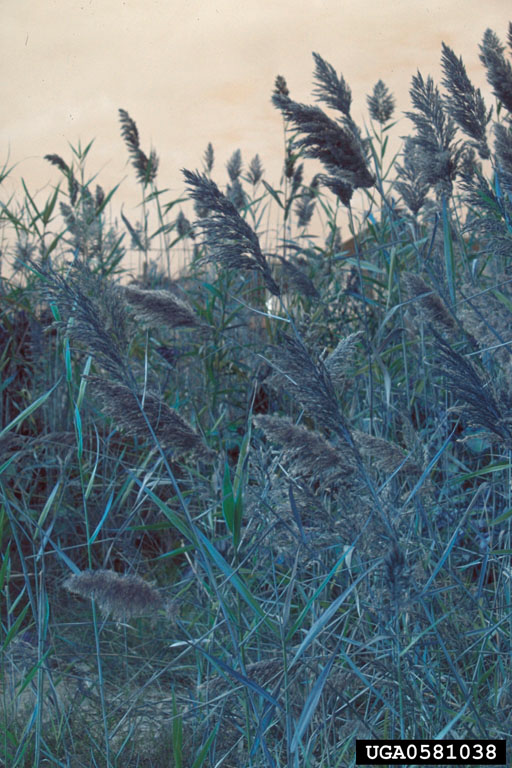

In [12]:
cv2.imread(os.path.join('data', 'phragmites', 'phragmites2010.jpg'))

In [13]:
img = cv2.imread(os.path.join('data', 'phragmites', 'phragmites2010.jpg'))

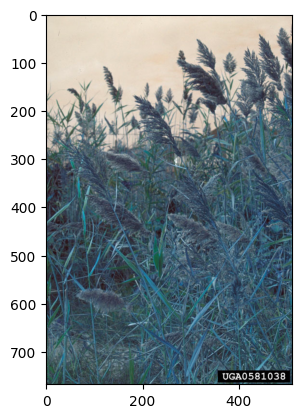

In [14]:
plt.imshow(img)

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [16]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 557 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128, 128))

Found 557 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
batch = data_iterator.next()

In [21]:
batch[0].shape

(32, 256, 256, 3)

In [22]:
batch[1]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

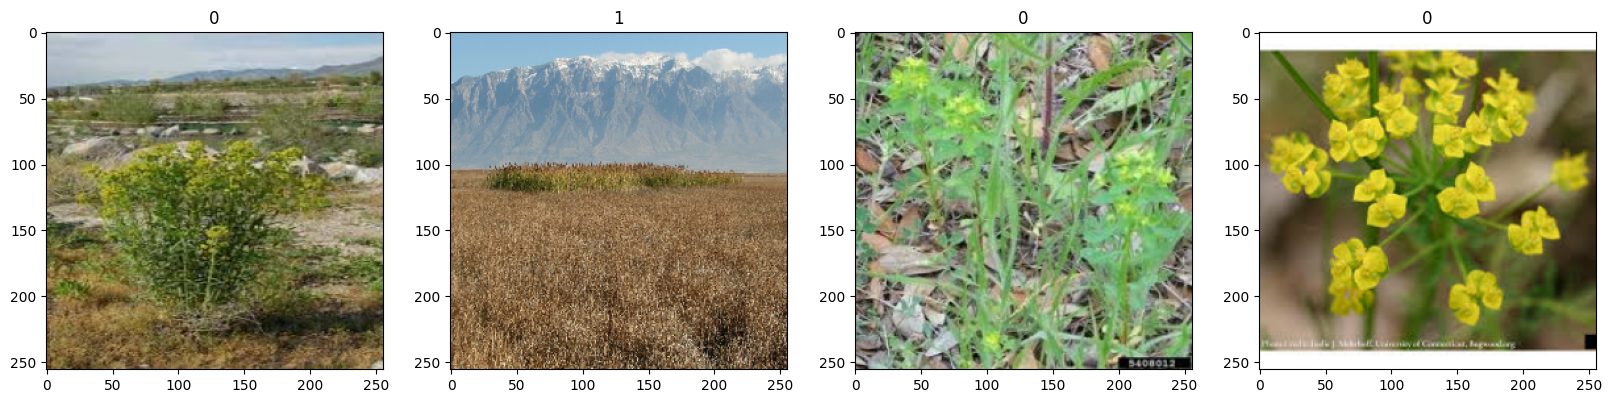

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
scaled = batch[0] / 255

In [25]:
scaled.min()

0.0

In [26]:
scaled.max()

1.0

In [27]:
data = data.map(lambda x, y: (x / 255, y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

In [30]:
batch[0].max()

1.0

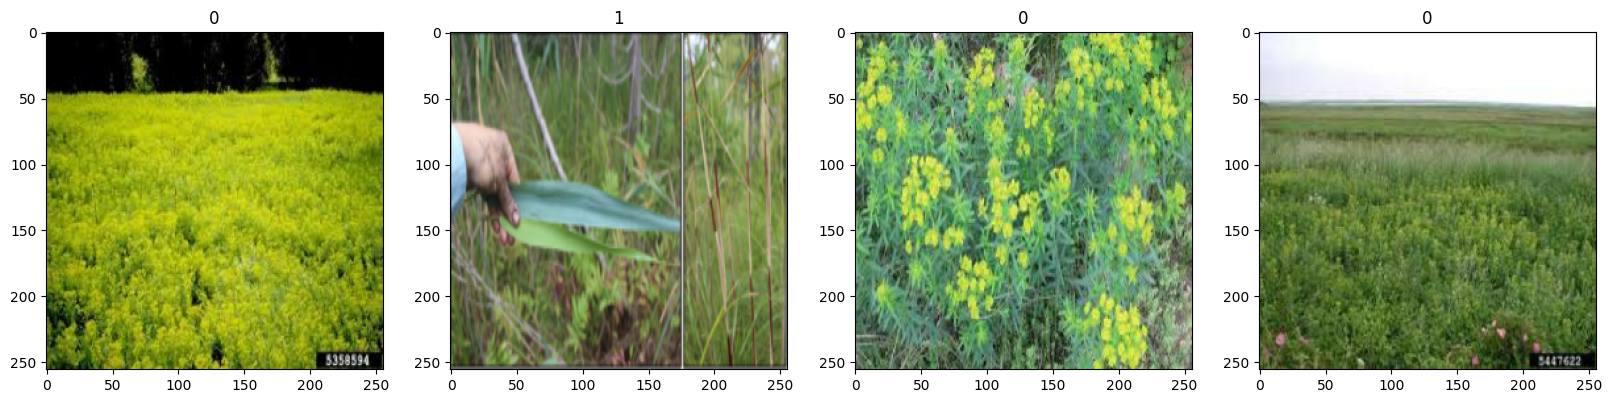

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
len(data)

18

In [33]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1

In [34]:
train_size + val_size + test_size

18

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [36]:
len(test)

2

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [38]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
logdir = 'logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.4465 - loss: 1.3477 - val_accuracy: 0.6797 - val_loss: 0.6168
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7377 - loss: 0.5631 - val_accuracy: 0.8438 - val_loss: 0.3476
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.8103 - loss: 0.3763 - val_accuracy: 0.8984 - val_loss: 0.2901
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.8699 - loss: 0.3204 - val_accuracy: 0.8984 - val_loss: 0.2426
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8964 - loss: 0.2448 - val_accuracy: 0.8906 - val_loss: 0.3296
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9106 - loss: 0.2290 - val_accuracy: 0.9531 - val_loss: 0.1617
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9510 - loss: 0.1259 - val_accuracy: 0.9297 - val_loss: 0.1367
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9368 - loss: 0.1854 - val_accuracy: 0.9297 - val_loss:

In [44]:
hist

In [45]:
hist.history

{'accuracy': [0.5052083134651184,
  0.7708333134651184,
  0.8229166865348816,
  0.8776041865348816,
  0.9088541865348816,
  0.9270833134651184,
  0.9270833134651184,
  0.9140625,
  0.9713541865348816,
  0.9635416865348816,
  0.9765625,
  0.9765625,
  0.984375,
  0.9973958134651184,
  0.9869791865348816,
  0.9869791865348816,
  0.9947916865348816,
  0.9921875,
  0.9947916865348816,
  0.9947916865348816],
 'loss': [1.028733491897583,
  0.5249454379081726,
  0.347696453332901,
  0.2999058961868286,
  0.2078714370727539,
  0.18390299379825592,
  0.17519675195217133,
  0.20649749040603638,
  0.0818370059132576,
  0.10023199766874313,
  0.0879986360669136,
  0.05664006248116493,
  0.04667572304606438,
  0.025549815967679024,
  0.03846874088048935,
  0.033294953405857086,
  0.025504065677523613,
  0.023396268486976624,
  0.01766008697450161,
  0.015259694308042526],
 'val_accuracy': [0.6796875,
  0.84375,
  0.8984375,
  0.8984375,
  0.890625,
  0.953125,
  0.9296875,
  0.9296875,
  0.9609375,

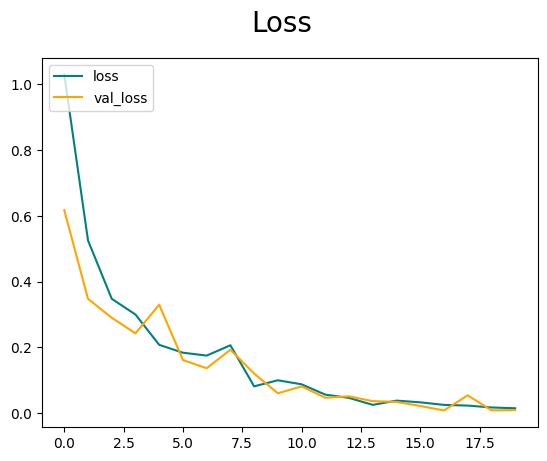

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

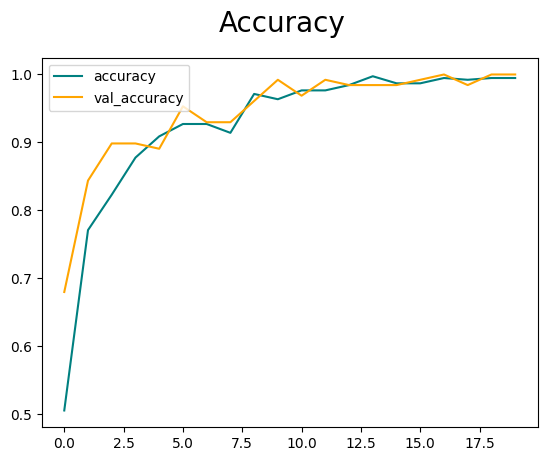

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


In [51]:
print((f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}'))


Precision:1.0, Recall:1.0, Accuracy:1.0


In [52]:
import cv2

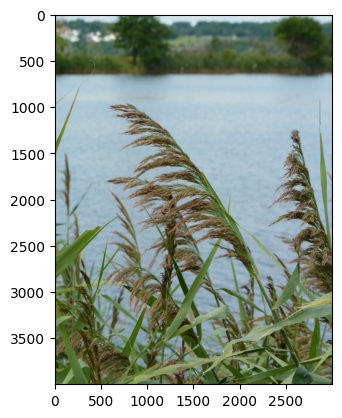

In [53]:
img = cv2.imread('Test #2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

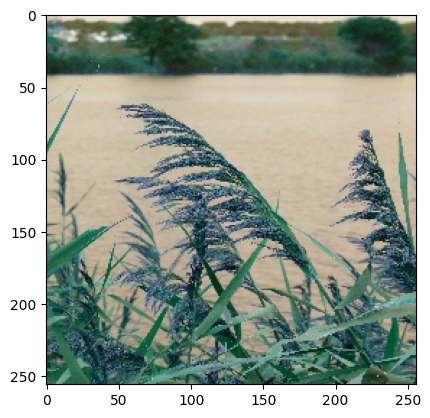

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [56]:
if yhat > 0.5:
    print(f'Predicted class is Phragmite')
else:
    print(f'Predicted class is Leafy Spurge')

Predicted class is Phragmite
